### Profit curves and imbalanced classes - supplementary code

In [1]:
# imports
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
%matplotlib inline

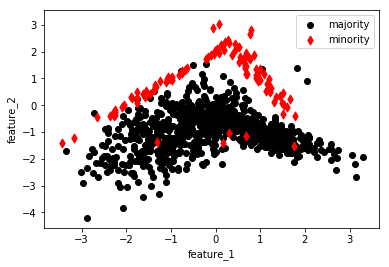

In [2]:
# make dummy data 2 informative features, 2 clusters, some overlap, minority class 10%
X, y = make_classification(n_samples = 1000, n_features=2, n_redundant=0,
                           n_informative=2, n_classes=2, weights=[0.9, 0.1], 
                           n_clusters_per_class=2, class_sep=1.0,
                           random_state = 3)
X0, X1 = X[y==0], X[y==1] # majority, minority class
plt.scatter(X0[:, 0], X0[:, 1], marker='o', c='k', label = 'majority')
plt.scatter(X1[:, 0], X1[:, 1], marker='d', c='r', label = 'minority', s = 40)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.legend();

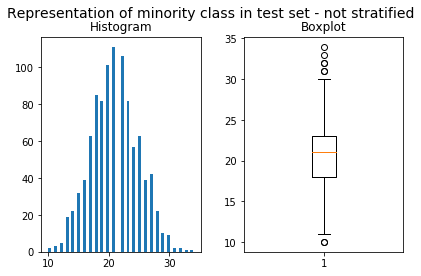

In [3]:
# perform an 80:20 train-test-split 1000 times and look at the number
# of minority class that ends up in test set
num_tt_splits = 1000
num_minority = np.zeros(num_tt_splits)
for i in range(num_tt_splits):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                       test_size=0.20, random_state=None)
    num_minority[i] = np.sum(y_test)

# now plot
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(num_minority, bins = 50)
ax1.set_title('Histogram')
ax2.boxplot(num_minority)
ax2.set_title('Boxplot')
fig.suptitle('Representation of minority class in test set - not stratified', 
             fontsize = 14)
fig.tight_layout(pad = 2);
# try re-running with random_state set

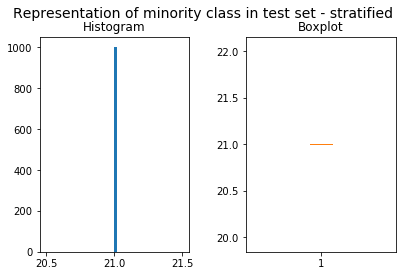

In [4]:
#now stratify when doing train_test_split
num_minority = np.zeros(num_tt_splits)
for i in range(num_tt_splits):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,
                                       test_size=0.20, random_state=None)
    num_minority[i] = np.sum(y_test)

# now plot
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(num_minority, bins = 50)
ax1.set_title('Histogram')
ax2.boxplot(num_minority)
ax2.set_title('Boxplot')
fig.suptitle('Representation of minority class in test set - stratified', 
             fontsize = 14)
fig.tight_layout(pad = 2);

### We've established that `stratify` maintains the proportion of the minority class in the test set.  Now let's look at the effect of `stratify` and `class_weight` on the performance of our model.

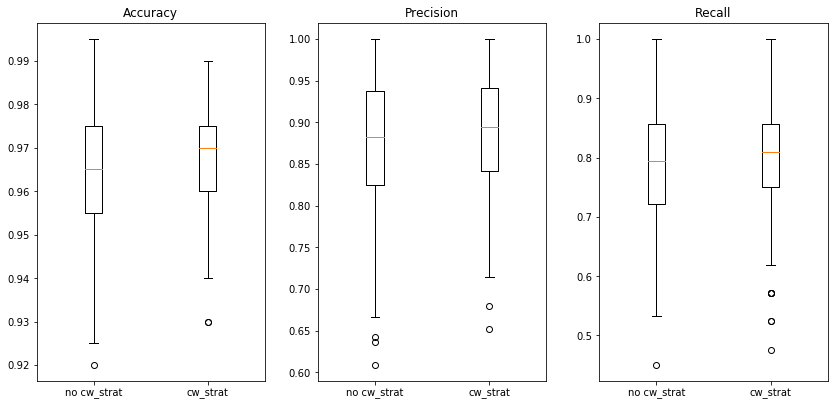

In [5]:
num_iter = 200
acc_ncw_nstrat_lst = [] # accuracy, no class weights, no stratification
prec_ncw_nstrat_lst = [] # precision, no class weights, no stratification
rcll_ncw_nstrat_lst = [] # recall, no class weights, no stratification

acc_cw_strat_lst = [] # accuracy, with class weights, with stratification
prec_cw_strat_lst = [] # precision, with class weights, with stratification
rcll_cw_strat_lst = [] # recall, with class weights, with stratification
for _ in range(num_iter):
    # base model - no class weights
    rf_nocw = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, 
                                      min_samples_split=2,min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_split=1e-07, 
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=None, verbose=0, warm_start=False,
                                      class_weight=None)

    # model that takes into account class weight
    rf_cw = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, 
                                      min_samples_split=2,min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_split=1e-07, 
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=None, verbose=0, warm_start=False,
                                      class_weight='balanced')

    # non-stratified train-test-split
    X_trn_nostrat, X_tst_nostrat, y_trn_nostrat, y_tst_nostrat = train_test_split(
                                                                X, y, test_size=0.20)
    # stratified train-test-split
    X_trn_strat, X_tst_strat, y_trn_strat, y_tst_strat = train_test_split(
                                                                X, y, stratify = y,
                                                                test_size=0.20)
    # fit model - no stratification or class weight
    rf_nocw.fit(X_trn_nostrat, y_trn_nostrat)
    y_pred_nocw_nostrat = rf_nocw.predict(X_tst_nostrat)
    acc_nocw_nostrat = accuracy_score(y_tst_nostrat, y_pred_nocw_nostrat)
    rcl_nocw_nostrat = recall_score(y_tst_nostrat, y_pred_nocw_nostrat)
    prc_nocw_nostrat = precision_score(y_tst_nostrat, y_pred_nocw_nostrat)

    # fit model - stratification and class weight
    rf_cw.fit(X_trn_strat, y_trn_strat)
    y_pred_cw_strat = rf_cw.predict(X_tst_strat)
    acc_cw_strat = accuracy_score(y_tst_strat, y_pred_cw_strat)
    rcl_cw_strat = recall_score(y_tst_strat, y_pred_cw_strat)
    prc_cw_strat = precision_score(y_tst_strat, y_pred_cw_strat)

#    print("  No strat, no cw - accuracy: {0:6.3f}, recall: {1:6.3f}, precision: {2:6.3f}".format(
#           acc_nocw_nostrat, rcl_nocw_nostrat, prc_nocw_nostrat))
#    print("With strat and cw - accuracy: {0:6.3f}, recall: {1:6.3f}, precision: {2:6.3f}".format(
#           acc_cw_strat, rcl_cw_strat, prc_cw_strat))
    
    acc_ncw_nstrat_lst.append(acc_nocw_nostrat)
    prec_ncw_nstrat_lst.append(prc_nocw_nostrat)
    rcll_ncw_nstrat_lst.append(rcl_nocw_nostrat)
    
    acc_cw_strat_lst.append(acc_cw_strat)
    prec_cw_strat_lst.append(prc_cw_strat)
    rcll_cw_strat_lst.append(rcl_cw_strat)

# now plot
labls = ['no cw_strat','cw_strat']
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(1,3,1)
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.boxplot([acc_ncw_nstrat_lst,acc_cw_strat_lst])
ax1.set_xticklabels(labls)
ax1.set_title('Accuracy')

ax2 = fig.add_subplot(1,3,2)
ax2.boxplot([prec_ncw_nstrat_lst, prec_cw_strat_lst])
ax2.set_xticklabels(labls)
ax2.set_title('Precision')

ax3 = fig.add_subplot(1,3,3)
ax3.boxplot([rcll_ncw_nstrat_lst, rcll_cw_strat_lst])
ax3.set_xticklabels(labls)
ax3.set_title('Recall')
fig.tight_layout(pad = 2);